In [1]:
import os
import h5py as h5
import numpy as np

import matplotlib.pyplot as plt


In [2]:
file_path = "../predict/160_10-layer/volumes/00/model_06-lowres-2024-01-29/160_10-layer_00_rot_predictions.h5"
assert os.path.exists(file_path)

In [3]:
data = {}

with h5.File(file_path, 'r') as hdf5_file:
    file = hdf5_file
    for key in hdf5_file.keys():
        data[key] = hdf5_file[key][:]
print(data.keys())

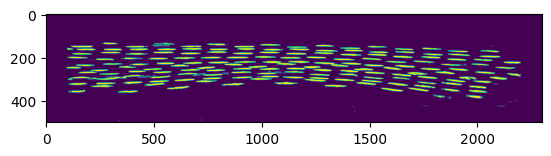

In [5]:

plt.imshow(data["predictions"][1,8,:,:])


In [6]:
data["labels"] = np.argmax(data["predictions"],axis=0)

In [7]:
data["labels"].shape

(2300, 500, 2300)

In [8]:
np.unique(data["labels"][8,:,:])

array([0, 1, 2])

In [13]:
# %matplotlib qt
plt.imshow(data["labels"][50,:,:])

In [10]:
data["labels"] = data["labels"].transpose(1,2,0)

In [11]:
data["labels"].shape

(500, 2300, 2300)

In [12]:
import nrrd
nrrd.write('160_10-layer_00_rot_predictions.nrrd', data["labels"])

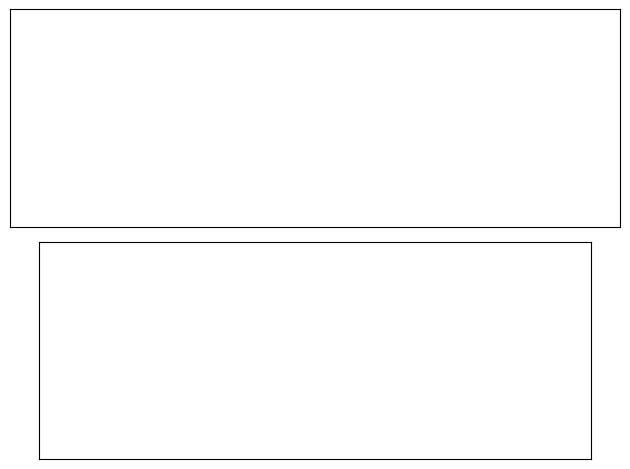

In [10]:
fig,axs = plt.subplots(2,1)

slice =2
# axs[0].imshow(raw[:,:,slice],cmap="gray")
axs[1].imshow(label[2,slice,:,:]);
# axs[2].imshow(labels[:,:,slice]);
# axs[3].imshow(labels[:,:,slice]);
# axs[4].imshow(labels[:,:,slice]);

for ax in axs: ax.set_xticks([]);ax.set_yticks([])

fig.tight_layout()

## Crop the volume by label dimensions

In [93]:
raw_out = raw[dim[0].min():dim[0].max(),dim[1].min()+20:dim[1].max(),dim[2].min():dim[2].max()].transpose(2,0,1)
label_out = label[dim[0].min():dim[0].max(),dim[1].min()+20:dim[1].max(),dim[2].min():dim[2].max()].transpose(2,0,1)
masks2_out = masks[:,dim[0].min():dim[0].max(),dim[1].min()+20:dim[1].max(),dim[2].min():dim[2].max()].transpose(0,3,1,2)

In [94]:
masks2_out.nbytes/1024/1024

1.861724853515625

In [95]:
masks2_out.shape

(2, 10, 196, 498)

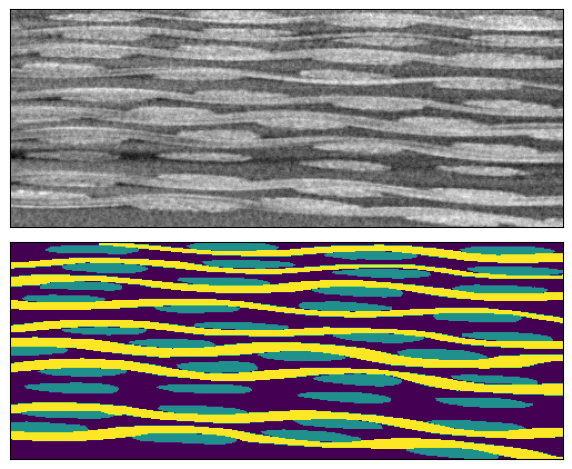

In [97]:
fig,axs = plt.subplots(2,1)

slice =1
axs[0].imshow(raw_out[slice,:,:],cmap="gray")
axs[1].imshow(label_out[slice,:,:]);
# axs[2].imshow(labels[:,:,slice]);
# axs[3].imshow(labels[:,:,slice]);
# axs[4].imshow(labels[:,:,slice]);

for ax in axs: ax.set_xticks([]);ax.set_yticks([])

fig.tight_layout()

In [109]:
obj_ids = np.unique(label_out)
obj_ids = obj_ids[:]

print(obj_ids)

masks3_out = label_out[:,:,:] == obj_ids[:, None, None,None]


masks3_out.shape

[0 1 2]


(3, 10, 196, 498)

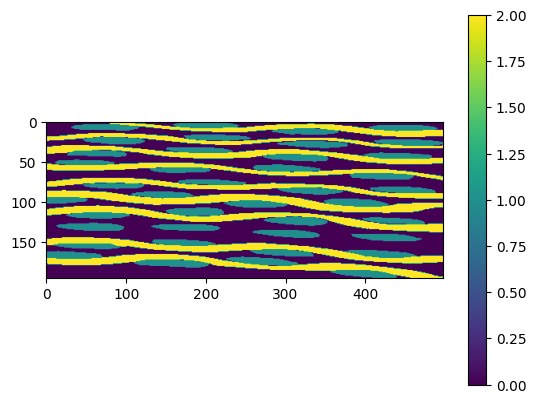

In [102]:
plt.imshow(label_out[slice,:,:])
plt.colorbar()

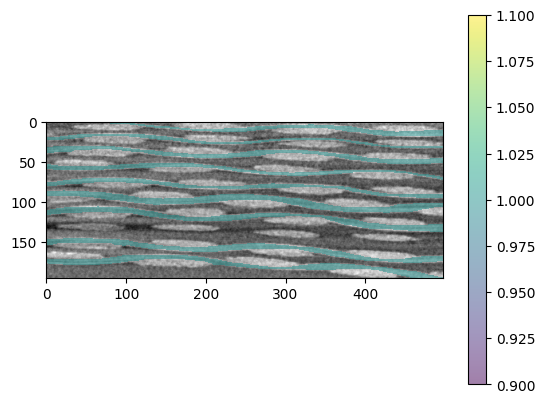

In [101]:
label_mask = masks2_out[1,slice,:,:]

# Overlay the label mask on the image
overlay = np.ma.masked_where(label_mask == False, label_mask)

# Plot the image and overlay
plt.imshow(raw_out[slice,:,], cmap='gray')
plt.imshow(overlay, cmap='viridis', alpha=0.5)  # Adjust alpha for transparency
plt.colorbar()  # Display colorbar for reference
plt.show()

In [21]:
for key in data.keys():

    print(key)

label
masks_2c
masks_3c
raw


In [22]:
out = {}

out['raw'] = data["raw"][:,:64,:64]
out['label'] = data["label"][:,:64,:64]
out['masks_2c'] = data["masks_2c"][:, :,:64,:64]
out['masks_3c'] = data["masks_3c"][:, :,:64,:64]

In [23]:
for key in out.keys():
    print(out[key].shape)

(10, 64, 64)
(10, 64, 64)
(2, 10, 64, 64)
(3, 10, 64, 64)


In [24]:
file_path = "../data/160_10-layer/volumes/00/160_10-layer_00_croped-test.h5"



with h5.File(file_path, 'w') as fout:
    for key in out.keys():
        fout.create_dataset(key, data = out[key])

In [114]:
file_path = "../data/160_10-layer/volumes/00/160_10-layer_00_rot.h5"

out = {}

out['raw'] = raw.transpose(2,0,1)

print(out['raw'].shape)

with h5.File(file_path, 'w') as fout:
    for key in out.keys():
        fout.create_dataset(key, data = out[key])

(2300, 500, 2300)


In [115]:
print(out['raw'].dtype)

uint8
